# Clustering

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from hdbscan import HDBSCAN

## Clustering algorithms

Clustering เป็นการแบ่งกลุ่ม unlabelled data

<img src="../images/clustering.png" width="1000" /><br />

## K-Means clustering

K-Means clustering เป็น clustering วิธีหนึ่ง แบ่งข้อมูลออกเป็น k กลุ่ม

ถ้า k = 2 เราจะสร้างจุดใหม่ขึ้นมา 2 จุดอย่างสุ่มที่เรียกว่า centroid จุดเหล่านั้นจะแบ่งกลุ่มข้อมูลออกเป็น 2 กลุ่ม โดย data point ที่มี centroid ที่ใกล้ที่สุดเป็นจุดเดียวกันจะถือว่าเป็นข้อมูลที่อยู่ในกลุ่มเดียวกัน จากนั้นเลื่อน centroid ไปยังค่าเฉลี่ยของข้อมูลในแต่ละกลุ่ม ข้อมูลถูกแบ่งกลุ่มใหม่เพราะ centroid เปลี่ยนตำแหน่ง เลื่อน centroid ไปยังค่าเฉลี่ยของข้อมูลในแต่ละกลุ่มอีกครั้ง ทำแบบนี้ไปเรื่อย ๆ จน converge (centroid แทบไม่เปลี่ยนตำแหน่ง)

<img src="../images/k_means.png" width="500" /><br />

Loss function ของ algorithm นี้ เรียกว่า <b>inertia</b> ซึ่งเป็นผลรวมของกำลังสองของระยะห่างของแต่ละ data point จาก centroid ที่ใกล้ที่สุด

เราสามารถทำ K-Means clustering ได้โดยใช้ 
- `sklearn.cluster.KMeans`
- `sklearn.cluster.MiniBatchKMeans` (เร็วกว่า)

```{note}
- ควรทำ PCA ก่อนเพื่อให้แยกข้อมูลได้ง่ายขึ้น
- ยิ่ง k มาก inertia ยิ่งน้อย เราต้องหา k ที่ทำให้ inertia ต่ำพอ (ใช้ elbow method)
```

In [32]:
# Import data and drop duplicates
data = pd.read_csv('../data/penguins.csv').drop_duplicates()
data

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,-0.909073,0.819349,-1.444400,-0.573025,Adelie
1,-0.835598,0.163907,-1.082147,-0.509474,Adelie
2,-0.688650,0.466419,-0.430091,-1.208528,Adelie
3,-0.872335,1.777301,-0.792344,-0.700125,Adelie
4,-0.945810,0.365582,-1.444400,-0.731901,Adelie
...,...,...,...,...,...
320,0.578782,-1.701579,0.946471,0.920410,Gentoo
321,0.505308,-1.399067,1.018922,0.825084,Gentoo
322,1.166577,-0.693208,1.526076,1.968991,Gentoo
323,0.211411,-1.146975,0.801570,1.269937,Gentoo


In [33]:
# Features (X) and target (y)
X = data.drop(columns="species")
y = data["species"]
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=12)
# Encode the target
label_encoder = LabelEncoder().fit(y_train)
y_train = pd.Series(data=label_encoder.transform(y_train), name="species")
y_test = pd.Series(data=label_encoder.transform(y_test), name="species")

In [34]:
# Compress data by PCA
pca = PCA(random_state=5).fit(X_train)
n_components = len(pca.components_)
X_train = pd.DataFrame(
    pca.transform(X_train),
    columns=[f'PC{i}' for i in range(1, n_components+1)]
)
X_test = pd.DataFrame(
    pca.transform(X_test),
    columns=[f'PC{i}' for i in range(1, n_components+1)]
)

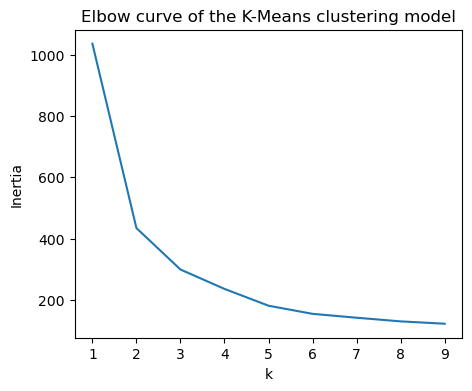

In [35]:
# Plot elbow curve
inertias = []
ks = range(1, 10)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10).fit(X_train)
    inertias.append(km.inertia_)
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(ks, inertias)
ax.set(
    xlabel='k',
    ylabel='Inertia',
    title='Elbow curve of the K-Means clustering model'
);

In [36]:
# Choose k at the elbow (2-3)
# k=3 seems reasonable as we have 3 classes of label
y_train.value_counts()

0    118
2     84
1     58
Name: species, dtype: int64

In [37]:
# K-Means clustering model with k=3
km = KMeans(n_clusters=3, n_init=10, random_state=5).fit(X_train)

In [38]:
# Predicted labels of the training set
km.labels_

array([1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0,
       0, 0, 1, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1,
       1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0])

In [39]:
# Actual labels of the training set
y_train.to_numpy()

array([0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 0, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2,
       1, 2, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 1])

In [40]:
# Compute clustering and transform X to cluster-distance space
X_train_transformed = pd.DataFrame(km.transform(X_train))
X_train_transformed

,0,1,2
0,1.264492,0.786378,3.016141
1,0.662926,1.483551,2.966222
2,3.239736,4.208982,0.780161
3,2.670509,1.371970,4.822816
4,1.161848,1.184996,2.767536
...,...,...,...
255,3.148411,4.128819,0.750870
256,3.466158,1.883111,4.393695
257,2.843228,3.806470,0.807018
258,3.199771,4.269100,0.990810


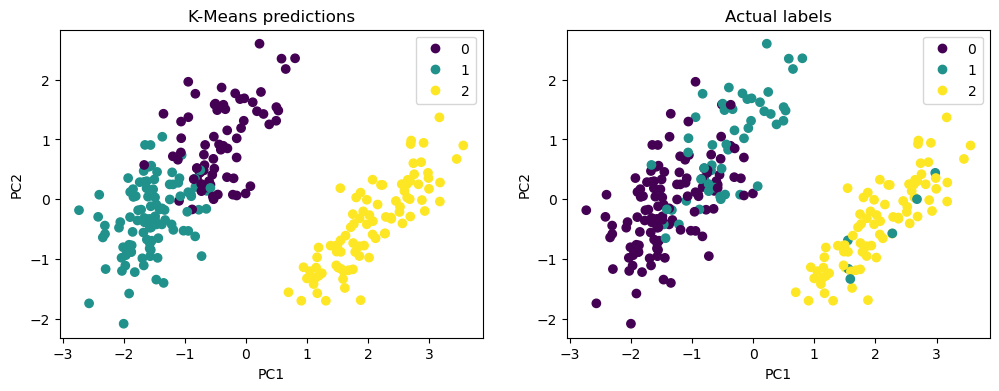

In [41]:
# Plot the predicted and actual labels of the training set in the PCA space
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scatter0 = axs[0].scatter(X_train['PC1'], X_train['PC2'], c=km.labels_)
axs[0].set(xlabel='PC1', ylabel='PC2', title='K-Means predictions')
axs[0].legend(*scatter0.legend_elements())
scatter1 = axs[1].scatter(X_train['PC1'], X_train['PC2'], c=y_train)
axs[1].set(xlabel='PC1', ylabel='PC2', title='Actual labels')
axs[1].legend(*scatter1.legend_elements());

## DBSCAN

DBSCAN = Density-based spatial clustering of applications with noise

หลักการคือ data point จะอยู่รวมกันหนาแน่น ส่วน noise จะกระจายตัวห่างกัน สิ่งที่เราจะทำคือระบุ cluster ของ data point (ระบุ island ของ data point ท่ามกลางทะเลของ noise)

Data point ใน algorithm นี้ ได้แก่
- Core เป็น data point ที่มีข้อมูลอื่นอย่างน้อย n จุดอยู่ภายในรัศมี $\epsilon$
- Border เป็น data point ที่มี core อย่างน้อย 1 จุดอยู่ภายในรัศมี $\epsilon$
- Noise เป็น data point ที่ไม่ใช่ทั้ง core และ border และมีข้อมูลอื่นน้อยกว่า n จุดอยู่ภายในรัศมี $\epsilon$

<img src="../images/core_border_noise.png" width="400" /><br />

Hyperparameter ที่สำคัญ เช่น
- `min_sample` คือค่า n ตามที่กำหนดด้านบน ควรมีค่าอย่างน้อย D + 1 โดยที่ D คือ dimension ของ dataset และ 2×D ถือว่าเป็นค่าที่ดี
- `eps` คือค่า $\epsilon$ ตามที่กำหนดด้านบน ควรจะมีค่าน้อย
- `metric` เป็นนิยามของ $\epsilon$

Algorithm นี้ เริ่มจากเลือก 1 data point อย่างสุ่ม แล้วเช็คว่าสามารถเป็น core ได้หรือไม่ ถ้าได้ ก็จะรวมเอา border รอบ ๆ มาอยู่ใน cluster เดียวกัน แล้วเช็คจุดอื่นไปเรื่อย ๆ

<img src="../images/dbscan.gif" width="500px" /><br />

DBSCAN ทำได้โดยใช้ `sklearn.cluster.DBSCAN` (ไม่มี mini-batch version เหมือนกับ K-Means clustering จึงใช้ได้กับ dataset ที่ไม่ใหญ่เกินไป)

เปรียบเทียบผลการทำ clustering โดยใช้ DBSCAN กับ K-Means clustering ได้ดังภาพ

<img src="../images/dbscan_vs_kmeans.png" width="600px" /><br />


In [42]:
# DBSCAN
dbscan = DBSCAN(eps=0.6).fit(X_train)

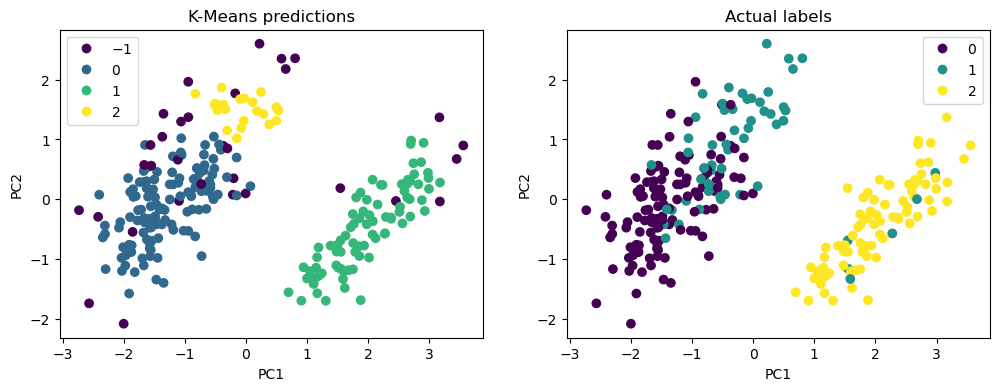

In [43]:
# Plot the predicted and actual labels of the training set in the PCA space
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scatter0 = axs[0].scatter(X_train['PC1'], X_train['PC2'], c=dbscan.labels_)
axs[0].set(xlabel='PC1', ylabel='PC2', title='K-Means predictions')
axs[0].legend(*scatter0.legend_elements())
scatter1 = axs[1].scatter(X_train['PC1'], X_train['PC2'], c=y_train)
axs[1].set(xlabel='PC1', ylabel='PC2', title='Actual labels')
axs[1].legend(*scatter1.legend_elements());

## HDBSCAN

HDBSCAN = Hierarchical DBSCAN
- ดีกว่า DBSCAN 
- ใช้ `hdbscan.HDBSCAN`

In [44]:
# HDBSCAN
hdbscan = HDBSCAN(cluster_selection_method='leaf', cluster_selection_epsilon=0.62).fit(X_train)

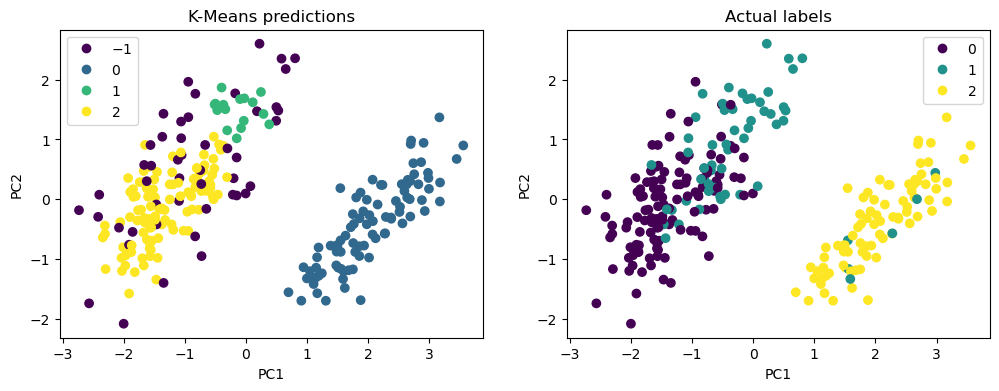

In [45]:
# Plot the predicted and actual labels of the training set in the PCA space
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
scatter0 = axs[0].scatter(X_train['PC1'], X_train['PC2'], c=hdbscan.labels_)
axs[0].set(xlabel='PC1', ylabel='PC2', title='K-Means predictions')
axs[0].legend(*scatter0.legend_elements())
scatter1 = axs[1].scatter(X_train['PC1'], X_train['PC2'], c=y_train)
axs[1].set(xlabel='PC1', ylabel='PC2', title='Actual labels')
axs[1].legend(*scatter1.legend_elements());